In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
sns.set(style="white", context='poster')
from sympy import *
import math
init_printing(use_unicode=True)
from scipy.integrate import solve_ivp

In [11]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
from model_equations_separate_NC_sep_vmax import *

In [13]:
import run_sensitivity

In [14]:

HCOLOR = '#ffc58f'
HCOLOR_light = '#ffd2a9'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

SHCOLOR = '#ffa98f'
SPCOLOR = '#326232'


ccnpalette = [PCOLOR, HCOLOR, SPCOLOR, SHCOLOR,DONCOLOR, RDONCOLOR, DINCOLOR]
ccnorder = ['Bp', 'Bh', 'Sp', 'Sh', 'DON', 'RDON', 'DIN', ]
cccpalette = [PCOLOR, HCOLOR, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
cccorder = ['Bp[C]', 'Bh[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hnpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
hnorder = [ 'Bh', 'Sp', 'Sh', 'DON', 'RDON', 'DIN']
hcpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
hcorder = [ 'Bh[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
pnpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
pnorder = [ 'Bp', 'Sp', 'Sh', 'DON', 'RDON', 'DIN']
pcpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
pcorder = [ 'Bp[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
sns.color_palette(ccnpalette + cccpalette, )
# 


In [65]:
paramorder = [
    'E^I_h',
 'E^I_p',
 'E^O_h',
 'E^O_p',
 
    
 'K^IC_h',
 'K^IC_p',
 'K^IN_h',
 'K^IN_p',
 'K^OC_h',
 'K^OC_p',
 'K^ON_h',
 'K^ON_p',
 'Vmax^IC_p',
 'Vmax^IN_h',
 'Vmax^IN_p',
 'Vmax^OC_h',
 'Vmax^ON_h',
    
 'M_h',
 'M_p',
 'gamma^D_h',
 'gamma^D_p',
 'O_h',
 'O_p',

    'E^S_h',
 'E^S_p',
 'K^S_h',
 'K^S_p',
 'M^S_h',
 'M^S_p',

    'epsilon',
    'VTmax',
]


In [15]:
refdf = pd.read_csv('prelim_bottle.csv')


In [76]:
dpath = r'C:\Users\wosnat\OneDrive - University of Haifa\Documents\results\recycle_model\res'
import glob

res_glob_pattern = '*_df.csv.gz'
sum_glob_pattern = '*_sum.csv.gz'

sum_df = pd.read_csv(os.path.join(dpath,'params_sensitivity_log_sum.csv.gz' ))
df =  pd.read_csv(os.path.join(dpath,'params_sensitivity_log_df.csv.gz' ))




In [77]:
sum_df.shape

C:\Users\wosnat\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wosnat\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\wosnat\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

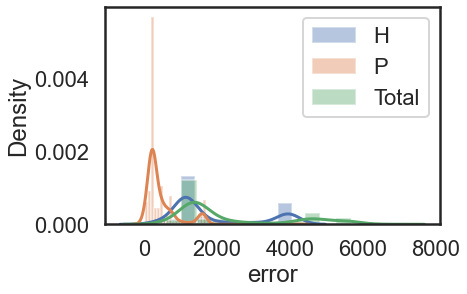

In [78]:
sns.distplot(sum_df.h_err, label='H')
sns.distplot(sum_df.p_err, label='P')
sns.distplot(sum_df.error, label='Total')
plt.legend()


In [79]:
sum_df.nsmallest(columns='error', n=10)

Unnamed: 0       M_h       M_p  gamma^D_p  gamma^D_h    R_p    R_h  \
926           0  0.000001  0.000001        0.8        0.8  6.625  6.625   
546           0  0.000001  0.000001        0.8        0.8  6.625  6.625   
62            0  0.000001  0.000001        0.8        0.8  6.625  6.625   
540           0  0.000001  0.000001        0.8        0.8  6.625  6.625   
54            0  0.000001  0.000001        0.8        0.8  6.625  6.625   
695           0  0.000001  0.000001        0.8        0.8  6.625  6.625   
681           0  0.000001  0.000001        0.8        0.8  6.625  6.625   
627           0  0.000001  0.000001        0.8        0.8  6.625  6.625   
570           0  0.000001  0.000001        0.8        0.8  6.625  6.625   
50            0  0.000001  0.000001        0.8        0.8  6.625  6.625   

        E^O_p  E^I_p  E^O_h  ...      r0_p      r0_h   b_p   b_h  \
926  0.000001    0.0    0.0  ...  0.000002  0.000002  0.01  0.01   
546  0.000001    0.0    0.0  ...  0.000002  0.000002  0.01  0.01   
62   0.000001    0.0    0.0  ...  0.000002  0.000002  0.01  0.01   
540  0.000001    0.0    0.0  ...  0.000002  0.000002  0.01  0.01   
54   0.000001    0.0    0.0  ...  0.000002  0.000002  0.01  0.01   
695  0.000001    0.0    0.0  ...  0.000002  0.000002  0.01  0.01   
681  0.000001    0.0    0.0  ...  0.000002  0.000002  0.01  0.01   
627  0.000001    0.0    0.0  ...  0.000002  0.000002  0.01  0.01   
570  0.000001    0.0    0.0  ...  0.000002  0.000002  0.01  0.01   
50   0.000001    0.0    0.0  ...  0.000002  0.000002  0.01  0.01   

                                      run_id  status       h_err       p_err  \
926    pse4_Vmax^IN_h_18_h-65777870851600903       0  427.406173  165.788707   
546      pse4_K^IN_p_20_h5550858566262168568       0  443.136437  152.564197   
62        pse4_K^IN_h_9_h-907144952032095112       0  443.903668  152.199163   
540       pse4_K^IN_p_21_h102449767300855603       0  418.612337  187.199860   
54        pse4_K^IN_h_8_h-315165028178013400       0  421.410688  186.733348   
695      pse4_K^IN_p_29_h3693672357872282070       0  322.585725  295.731667   
681      pse4_K^IN_h_10_h6839943840595503144       0  509.138319  110.102154   
627      pse4_K^IN_p_19_h4966897558037381112       0  509.303786  110.402517   
570  pse4_Vmax^IN_h_19_h-4470976684050505000       0  417.252715  203.680535   
50       pse4_K^IN_p_22_h4451689100485226803       0  412.386103  208.630512   

          error  logerror  
926  593.194880  6.385523  
546  595.700634  6.389738  
62   596.102831  6.390413  
540  605.812198  6.406570  
54   608.144036  6.410412  
695  618.317392  6.427002  
681  619.240473  6.428494  
627  619.706303  6.429246  
570  620.933250  6.431224  
50   621.016616  6.431358  

[10 rows x 50 columns]

In [80]:
df.head()

Unnamed: 0         Bp         Bh        DON      RDON         DIN  \
0           0   1.100000  44.000000  20.000000  0.000000  100.000000   
1           1   2.606905  40.845128   0.067099  1.699377  119.881490   
2           2  10.842238  23.018451   0.150207  3.829530  127.259574   
3           3  27.740282  23.663551   0.448722  5.486430  107.761015   
4           4  61.084571  25.858402   2.747163  8.092578   67.317285   

          DOC       RDOC          DIC        ROS  ...  Treleasep  Tbreakdownh  \
0  132.500000   0.000000  3000.000000   0.000000  ...   0.000004     0.000000   
1    0.089231  11.258375  3039.549191   0.021642  ...   0.000008     0.000008   
2    0.722334  25.370638  2993.783387   0.296117  ...   0.000035     0.000031   
3   29.196912  36.347602  2939.619800   2.732615  ...   0.000089     0.000054   
4  191.495358  53.613329  2851.435558  15.651949  ...   0.000195     0.000064   

   respirationp  respirationh    dic_uptake       Bp[C]       Bh[C]  \
0      0.000002      0.000094 -1.040834e-16    7.287500  291.500000   
1      0.000006      0.000086 -7.580262e-04   17.270745  270.598975   
2      0.000024      0.000049  1.191517e-04   71.829825  152.497235   
3      0.000060      0.000050  1.157287e-03  183.779367  156.771024   
4      0.000132      0.000055  2.847485e-03  404.685283  171.311915   

          Sp[C]         Sh[C]                                run_id  
0  0.000000e+00  0.000000e+00  pse4_epsilon_8_h-1349854120224453962  
1  1.915195e-10  6.157405e-10  pse4_epsilon_8_h-1349854120224453962  
2  1.240144e-09  1.286496e-09  pse4_epsilon_8_h-1349854120224453962  
3  3.436619e-09  1.635627e-09  pse4_epsilon_8_h-1349854120224453962  
4  8.416035e-09  1.994207e-09  pse4_epsilon_8_h-1349854120224453962  

[5 rows x 54 columns]

In [81]:
df.columns

Index(['Unnamed: 0', 'Bp', 'Bh', 'DON', 'RDON', 'DIN', 'DOC', 'RDOC', 'DIC',
       'ROS', 'Sp', 'Sh', 't', 'day', 'Xp', 'Xh', 'limINp', 'limONp', 'limICp',
       'limOCp', 'limINh', 'limONh', 'limICh', 'limOCh', 'gross_uptakeINp',
       'gross_uptakeONp', 'gross_uptakeICp', 'gross_uptakeOCp',
       'gross_uptakeINh', 'gross_uptakeONh', 'gross_uptakeICh',
       'gross_uptakeOCh', 'actual_uptakeNp', 'actual_uptakeNh', 'overflowNp',
       'overflowCp', 'overflowNh', 'overflowCh', 'deathp', 'deathh',
       'exudationOp', 'exudationIp', 'exudationOh', 'exudationIh', 'Treleasep',
       'Tbreakdownh', 'respirationp', 'respirationh', 'dic_uptake', 'Bp[C]',
       'Bh[C]', 'Sp[C]', 'Sh[C]', 'run_id'],
      dtype='object')

In [82]:
mdf = df.melt(id_vars=['run_id', 'day', 't'], value_vars=ccxorder+ccnorder+cccorder)

In [83]:
sum_df.run_id.unique()

array(['pse4_gamma^D_p_14_h404899423403315256',
       'pse4_epsilon_11_h-7417325587466971033',
       'pse4_K^IN_h_29_h1840759308536491587',
       'pse4_K^IN_p_24_h7836943193073744922',
       'pse4_VTmax_29_h-6586822848876887696',
       'pse4_E^I_p_28_h-803296682712597538',
       'pse4_K^S_h_28_h-8738540719289059734',
       'pse4_Vmax^OC_h_14_h-783202764193984799',
       'pse4_gamma^D_h_21_h5538758237743184440',
       'pse4_K^OC_h_17_h-904460109165978568',
       'pse4_omega_20_h1500435541671949899',
       'pse4_E^S_p_0_h-6223510555989731342',
       'pse4_M^S_p_17_h3683362108767679349',
       'pse4_E^O_p_29_h2079050017513282236',
       'pse4_omega_11_h7538272678726728356',
       'pse4_epsilon_26_h-2797188749347897916',
       'pse4_K^ON_h_14_h6658666621534962360',
       'pse4_Vmax^IC_p_11_h-3904415550412993478',
       'pse4_omega_4_h8410375068006905764',
       'pse4_E^O_h_8_h3295335955565956740',
       'pse4_E^O_p_25_h-516416851545782250',
       'pse4_M^S_h_7_h-544090

In [84]:
sum_df[['sen_param', 'idx']] = sum_df.run_id.str.replace('pse3_', '').replace(r'_h[\-]?\d+','', regex=True).str.rsplit('_', n=1, expand=True)

In [92]:
df[['sen_param', 'idx']] = df.run_id.str.replace('pse4_', '').replace(r'_h[\-]?\d+','', regex=True).str.rsplit('_', n=1, expand=True)

In [93]:
df.min()

Unnamed: 0                                         0
Bp                                               0.0
Bh                                               0.0
DON                                         0.000672
RDON                                             0.0
DIN                                      -386.340986
DOC                                  -1030865.211261
RDOC                                             0.0
DIC                                          0.21411
ROS                                              0.0
Sp                                               0.0
Sh                                               0.0
t                                                0.0
day                                              0.0
Xp                                          0.002958
Xh                                               0.0
limINp                                      0.015687
limONp                                      0.004679
limICp                                      0.

In [94]:
problematic_run_ids = np.concatenate ([df.loc[df.DOC < 0, 'run_id'].unique() , df.loc[df.DIN < 0, 'run_id'].unique()])

In [95]:
problematic_run_ids

array(['pse4_K^OC_h_1_h6205908045031546913',
       'pse4_Vmax^OC_h_29_h-8911560595531620269',
       'pse4_K^IN_p_1_h-7080699751114827794',
       'pse4_K^IN_p_0_h-6669623993019333046'], dtype=object)

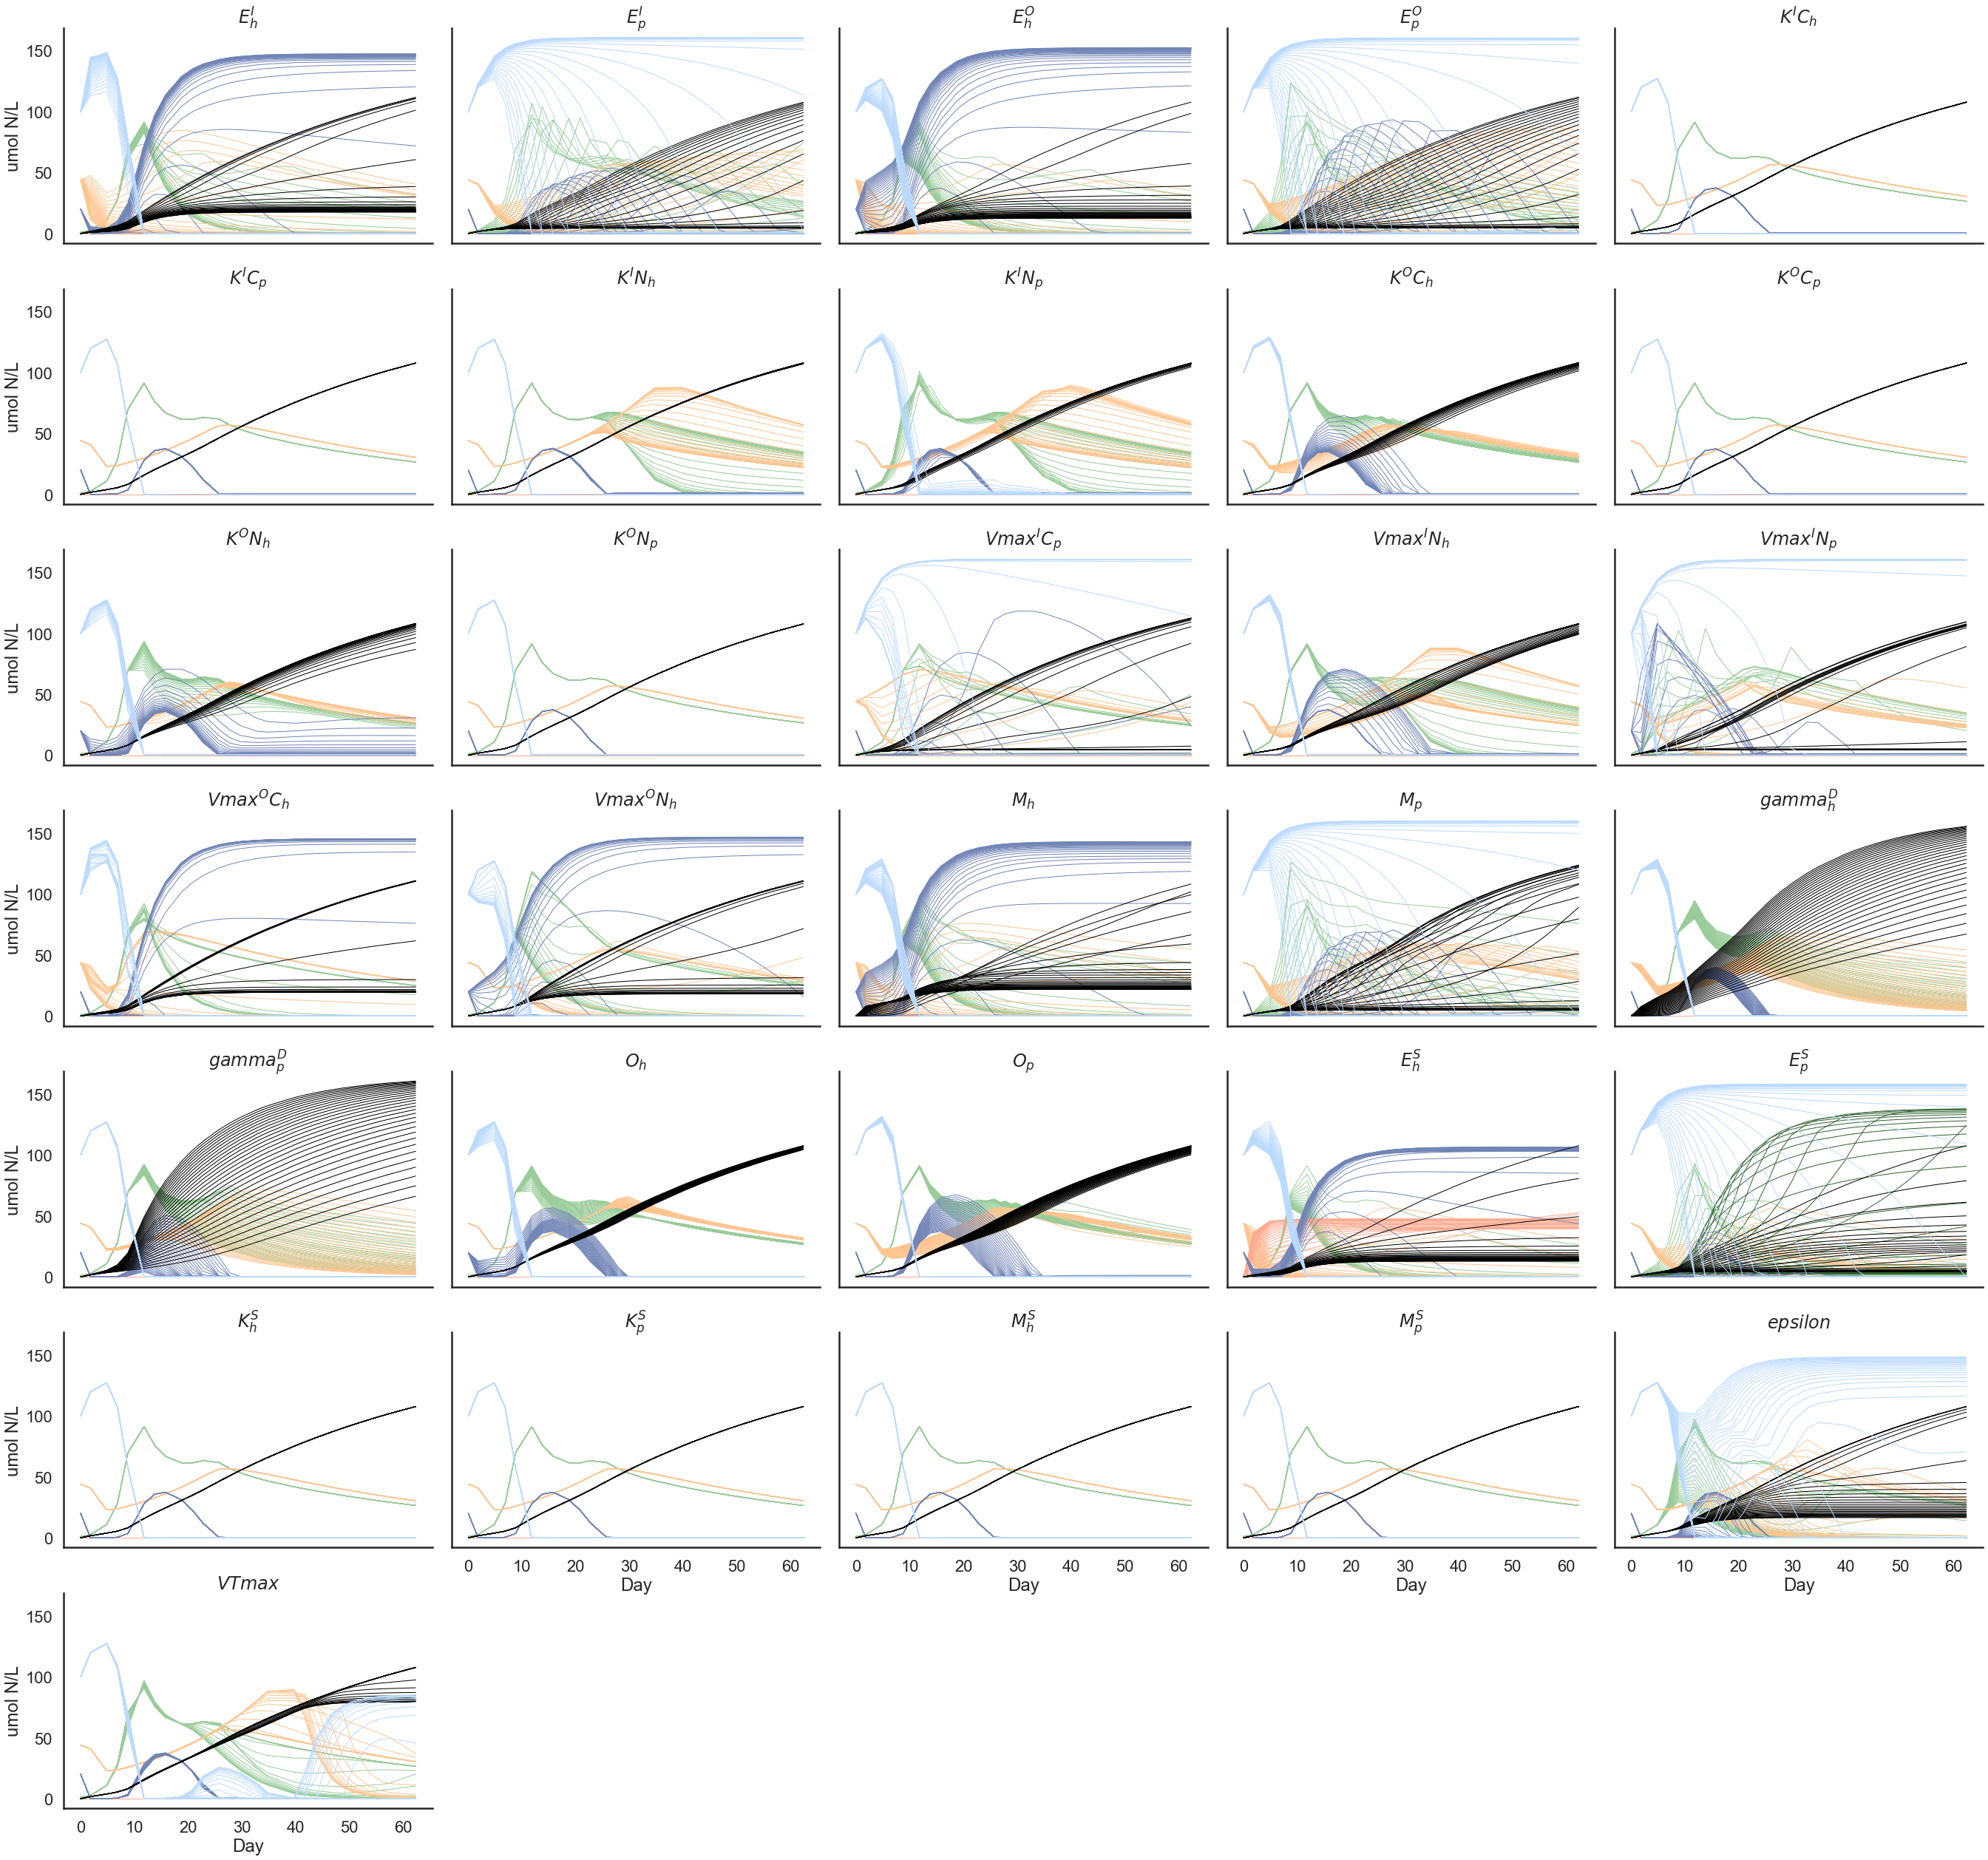

In [96]:
mdf2 = df.melt(id_vars=['run_id', 'day', 't', 'sen_param'], value_vars=ccnorder+cccorder)                            
mdf2['Day'] =mdf2['day'].round(5)
mdf2['param_name'] = '$' + mdf2['sen_param'] + '$'

mdf2 = mdf2.loc[~mdf2['run_id'].isin(problematic_run_ids)]


g = sns.relplot(
    data=mdf2, 
    x='Day', y='value',
    hue='variable', hue_order=ccnorder, palette=ccnpalette,
    estimator=None, units='run_id',
    col='sen_param', col_order= paramorder,
    col_wrap=5,
    kind='line', lw=1,
    aspect=1.5, legend=False,
)
    


#g.map_dataframe(pp)


g.set(ylabel='umol N/L')
g.set_titles(col_template='${col_name}$',)


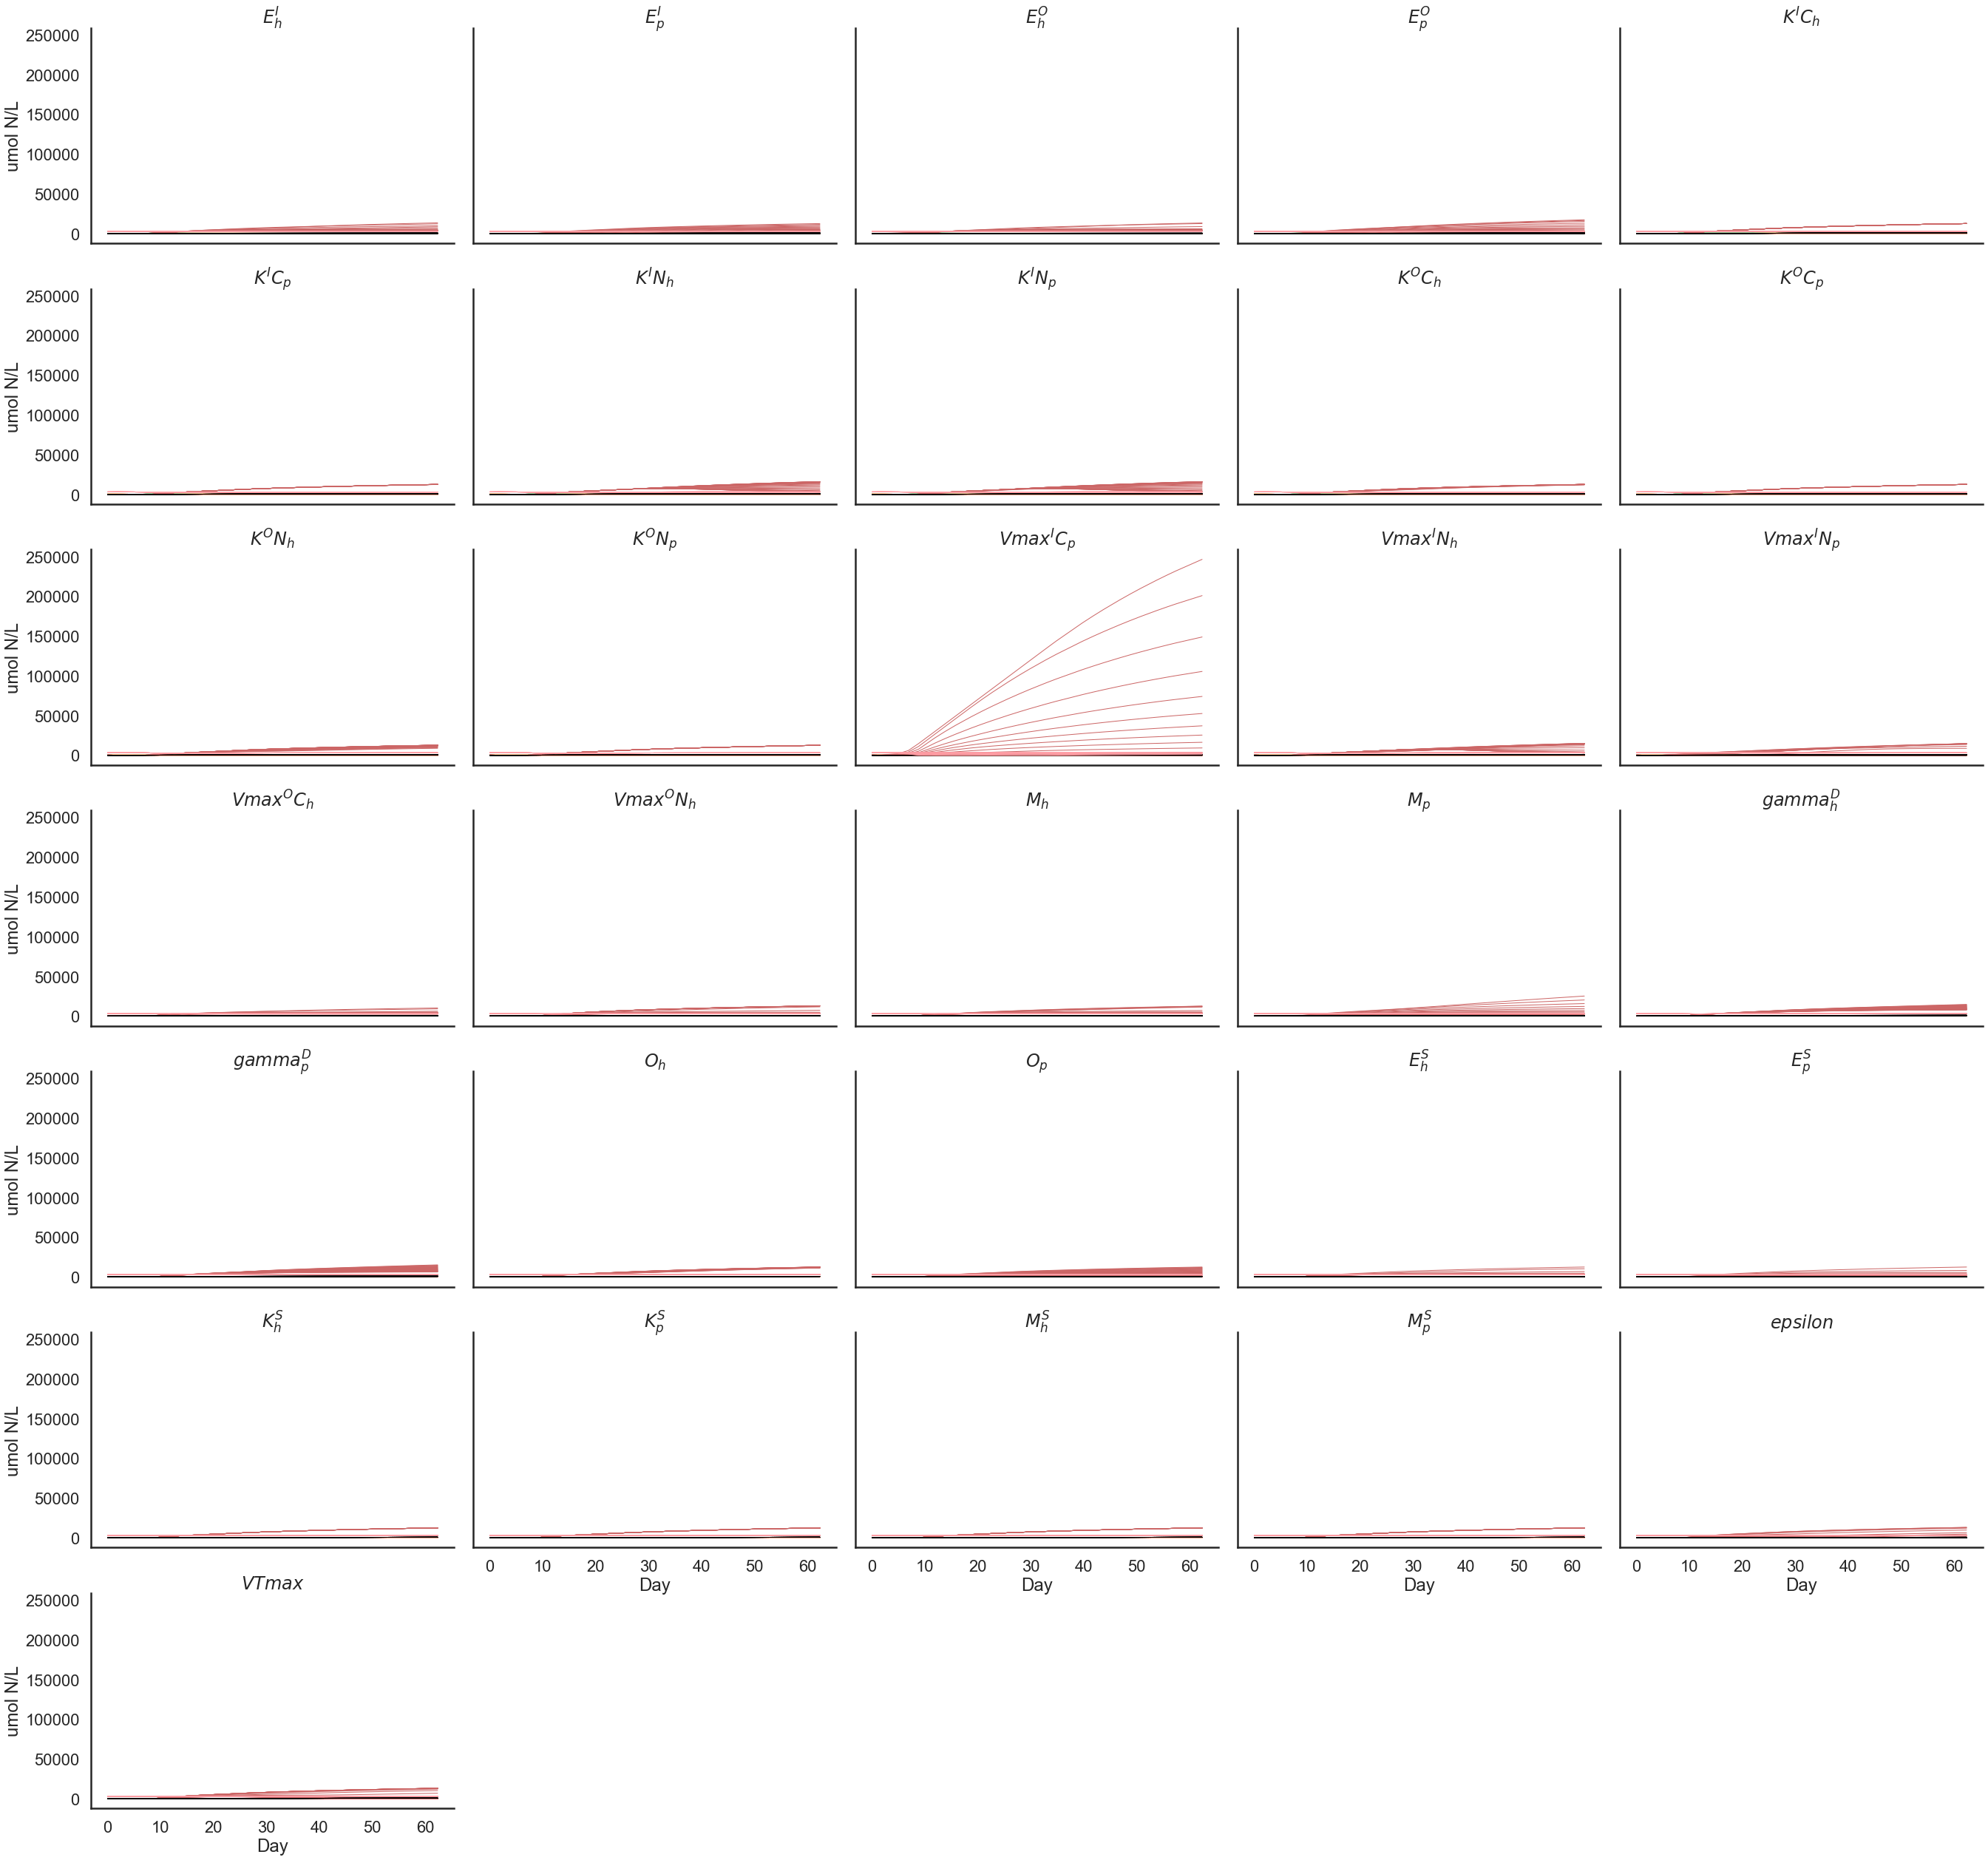

In [101]:
mdf2 = df.melt(id_vars=['run_id', 'day', 't', 'sen_param'], value_vars=ccnorder+cccorder)                            
mdf2['Day'] =mdf2['day'].round(5)
mdf2['param_name'] = '$' + mdf2['sen_param'] + '$'

mdf2 = mdf2.loc[~mdf2['run_id'].isin(problematic_run_ids)]


g = sns.relplot(
    data=mdf2, 
    x='Day', y='value',
    hue='variable', hue_order=cccorder, palette=cccpalette,
    estimator=None, units='run_id',
    col='sen_param', col_order= paramorder,
    col_wrap=5,
    kind='line', lw=1,
    aspect=1.5, legend=False,
)
    


#g.map_dataframe(pp)


g.set(ylabel='umol N/L', #ylim=(0,10000)
     )
g.set_titles(col_template='${col_name}$',)


In [98]:
sum_df.groupby ('sen_param')['idx'].count()

sen_param
pse4_E^I_h        30
pse4_E^I_p        30
pse4_E^O_h        30
pse4_E^O_p        30
pse4_E^S_h        30
pse4_E^S_p        30
pse4_KT_h         30
pse4_K^IC_h       30
pse4_K^IC_p       30
pse4_K^IN_h       30
pse4_K^IN_p       30
pse4_K^OC_h       30
pse4_K^OC_p       30
pse4_K^ON_h       30
pse4_K^ON_p       30
pse4_K^S_h        30
pse4_K^S_p        30
pse4_M^S_h        30
pse4_M^S_p        30
pse4_M_h          30
pse4_M_p          30
pse4_O_h          30
pse4_O_p          30
pse4_VTmax        30
pse4_Vmax^IC_p    24
pse4_Vmax^IN_h    29
pse4_Vmax^IN_p    25
pse4_Vmax^OC_h    25
pse4_Vmax^ON_h    29
pse4_epsilon      30
pse4_gamma^D_h    30
pse4_gamma^D_p    30
pse4_omega        30
Name: idx, dtype: int64

In [99]:
lowest_ids = sum_df.nsmallest(columns='error', n=10)['run_id']

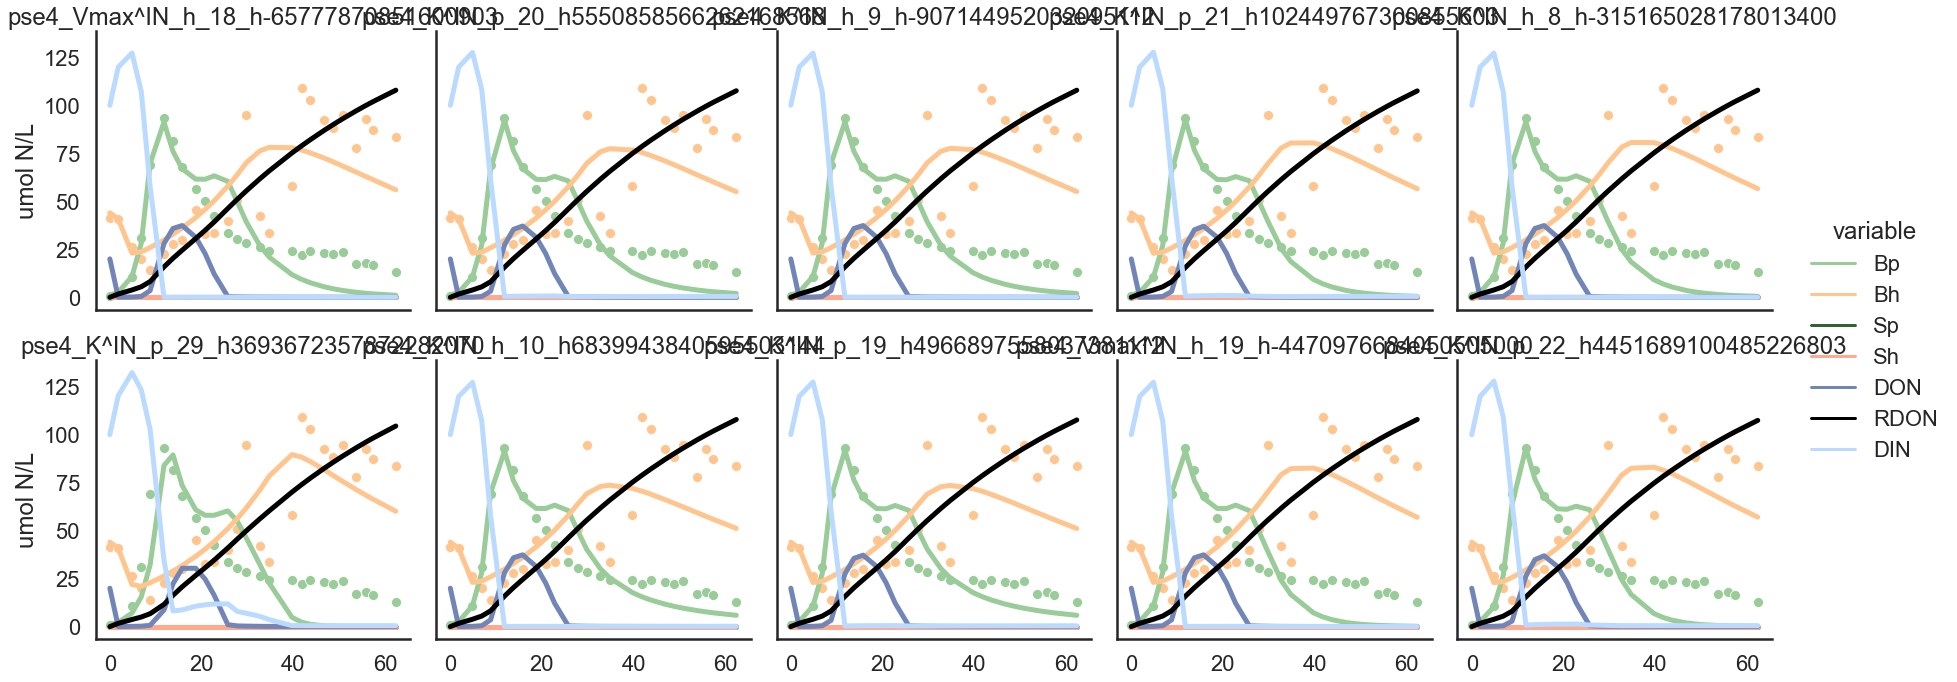

In [100]:
g = sns.relplot(
    data=mdf.loc[mdf.variable.isin(ccnorder) & mdf.run_id.isin(lowest_ids)], 
    x='day', y='value',
    hue='variable', hue_order=ccnorder, palette=ccnpalette,
    #estimator=None, units='run_id',
    col='run_id', col_order=lowest_ids, col_wrap=5,
    kind='line', lw=5,
)


def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf, x='day', y='cc Bp[N]', ax=ax, s=100, legend=False, color=PCOLOR)
    sns.scatterplot(data=refdf, x='day', y='cc Bh[N]', ax=ax, s=100, legend=False, color=HCOLOR)

g.map(pp)
g.set(ylabel='umol N/L')
g.set_titles(col_template='{col_name}',)

